# Projekt 1
#### Mateusz Grzyb, Bartłomiej Eljasiak

## Zbiór danych

Zgodnie z sugestią, przesłaną drogą mailową, postanowiliśmy zmienić zbiór danych z cervical-cancer na sick.

Autor: Ross Quinlan

Nazwa: sick

Źródła: 

* https://datahub.io/machine-learning/sick#data 

* http://archive.ics.uci.edu/ml/datasets/thyroid+disease

## Opis zbioru

Thyroid disease records supplied by the Garavan Institute and J. Ross Quinlan, New South Wales Institute, Syndney, Australia. 1987.

## Wczytanie pakietów

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8] # setting bigger, fixed size for plots
import seaborn as sns
import missingno as msno 
from IPython.display import display

## Wczytanie danych

In [3]:
data=pd.read_csv('sick.csv')
pd.set_option('display.max_columns', None)
display(data)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.00,t,2.1,t,124.0,t,1.08,t,114.0,f,NaN,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.10,t,1.8,t,112.0,t,1.07,t,105.0,f,NaN,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.70,t,2.0,t,82.0,t,0.94,t,87.0,f,NaN,SVI,negative


## Typy zmiennych i braki danych

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3771 non-null float64
sex                          3622 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3403 non-null

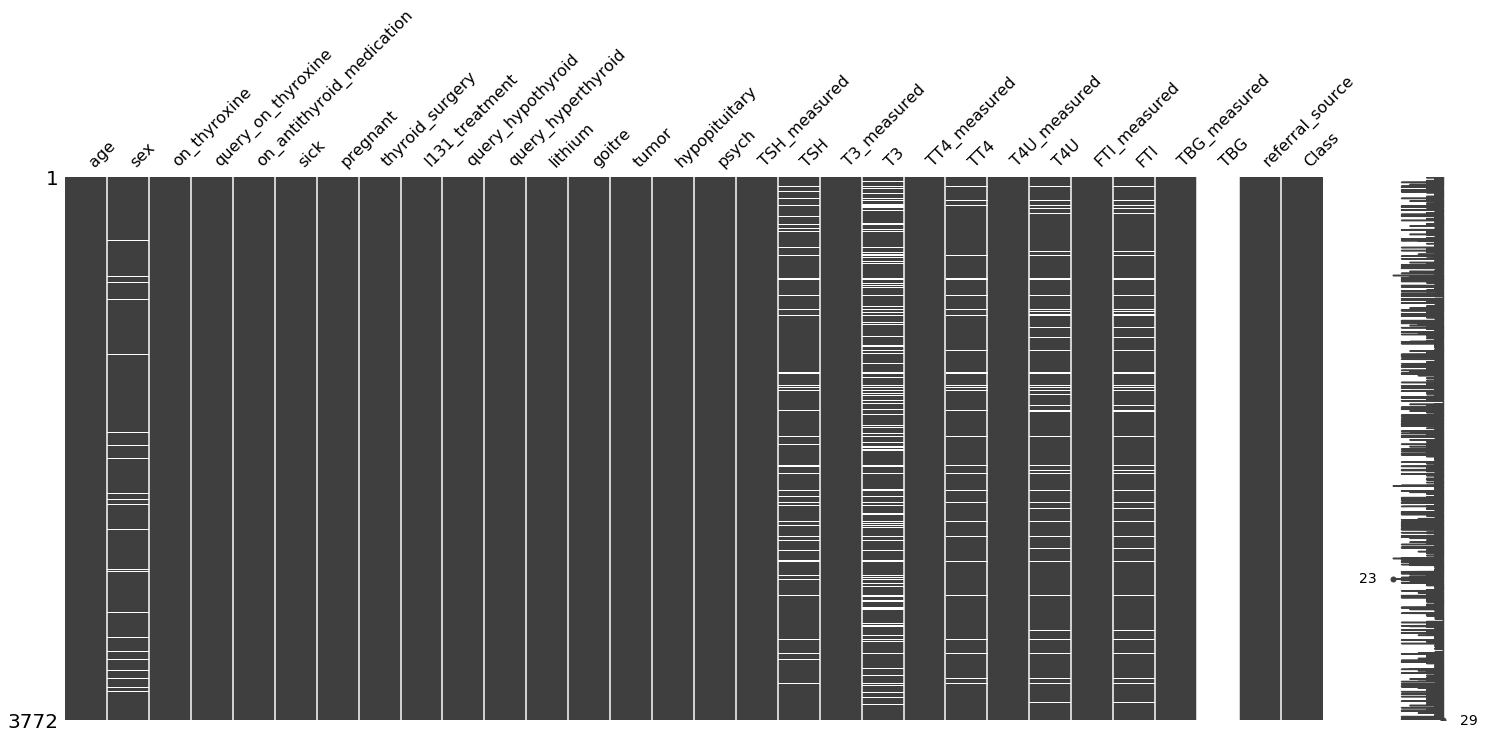

In [5]:
msno.matrix(data);

#### Komentarz
Dane obejmują 3772 pacjentów, zmienne są typów int, float i str, występują braki danych. Wiele spośród zmiennych typu str może być rzutowanych na typ bool. Braki danych dotyczą płci oraz wyników poszczególnych testów tarczycowych

Przydatne linki objaśniające niektóre zmienne:

* https://en.wikipedia.org/wiki/Thyroid_hormones

* https://www.radiologyinfo.org/en/info.cfm?pg=radioiodine

* https://en.wikipedia.org/wiki/Goitre

* https://www.glowm.com/resources/glowm/cd/pages/resources/Lab/Thyroid_Function_Tests.htm

* https://en.wikipedia.org/wiki/Thyroxine-binding_globulin

## Czyszczenie danych

### Rzutowanie str na bool

In [6]:
cdata=data.copy()

# sex (F == True, M == False)
cdata.loc[:, 'sex']=(cdata.loc[:, 'sex']=='F')

# pozostałe zmienne (t == True, f == False)
variables=set(list(data.columns))-set(['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'referral_source', 'Class']) 
for variable in variables:
    cdata.loc[:, variable]=(cdata.loc[:, variable]=='t')
    
cdata

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1.30,True,2.5,True,125.0,True,1.14,True,109.0,False,NaN,SVHC,negative
1,23.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4.10,True,2.0,True,102.0,False,NaN,False,NaN,False,NaN,other,negative
2,46.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.98,False,NaN,True,109.0,True,0.91,True,120.0,False,NaN,other,negative
3,70.0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.16,True,1.9,True,175.0,False,NaN,False,NaN,False,NaN,other,negative
4,70.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.72,True,1.2,True,61.0,True,0.87,True,70.0,False,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,other,negative
3768,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1.00,True,2.1,True,124.0,True,1.08,True,114.0,False,NaN,SVI,negative
3769,74.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,5.10,True,1.8,True,112.0,True,1.07,True,105.0,False,NaN,other,negative
3770,72.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.70,True,2.0,True,82.0,True,0.94,True,87.0,False,NaN,SVI,negative


### Usunięcie redundantnych kolumn

In [7]:
# (a) jezeli pomiaru nie bylo to jego wynik jest NaN,
# (b) jesli byl, to nie jest NaN
variables=['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

print('(a)')
for variable in variables:
    print('Dla '+variable+': '+str(all(np.isnan(cdata.loc[cdata.loc[:, variable+'_measured']==False, variable]))))
print('\n(b)')
for variable in variables:
    print('Dla '+variable+': '+str(all(~np.isnan(cdata.loc[cdata.loc[:, variable+'_measured']==True, variable]))))

(a)
Dla TSH: True
Dla T3: True
Dla TT4: True
Dla T4U: True
Dla FTI: True
Dla TBG: True

(b)
Dla TSH: True
Dla T3: True
Dla TT4: True
Dla T4U: True
Dla FTI: True
Dla TBG: True


In [8]:
# usunmy te kolumny
variables=np.core.defchararray.add(variables, np.repeat('_measured', len(variables)))
cdata=cdata.drop(variables, axis=1)
cdata

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,Class
0,41.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.30,2.5,125.0,1.14,109.0,NaN,SVHC,negative
1,23.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.10,2.0,102.0,NaN,NaN,NaN,other,negative
2,46.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.98,NaN,109.0,0.91,120.0,NaN,other,negative
3,70.0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.16,1.9,175.0,NaN,NaN,NaN,other,negative
4,70.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.72,1.2,61.0,0.87,70.0,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.00,2.1,124.0,1.08,114.0,NaN,SVI,negative
3769,74.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,5.10,1.8,112.0,1.07,105.0,NaN,other,negative
3770,72.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.70,2.0,82.0,0.94,87.0,NaN,SVI,negative


### Usunięcie kolumny bez danych

In [9]:
# kolumna TBG nie zawiera ani jednego pomiaru
all(np.isnan(cdata.loc[:, 'TBG']))

# usunmy te kolumne
cdata=cdata.drop('TBG', axis=1)
cdata

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.72,1.2,61.0,0.87,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.00,2.1,124.0,1.08,114.0,SVI,negative
3769,74.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,5.10,1.8,112.0,1.07,105.0,other,negative
3770,72.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.70,2.0,82.0,0.94,87.0,SVI,negative


### Błedne dane

In [10]:
# najdluzej zyjacy czlowiek zyl 122 lata (a tutaj jeden ma 455...)
cdata.loc[cdata.age>125, 'age']=None

## Analiza zmiennych

### Rozkłady zmiennych kategorycznych

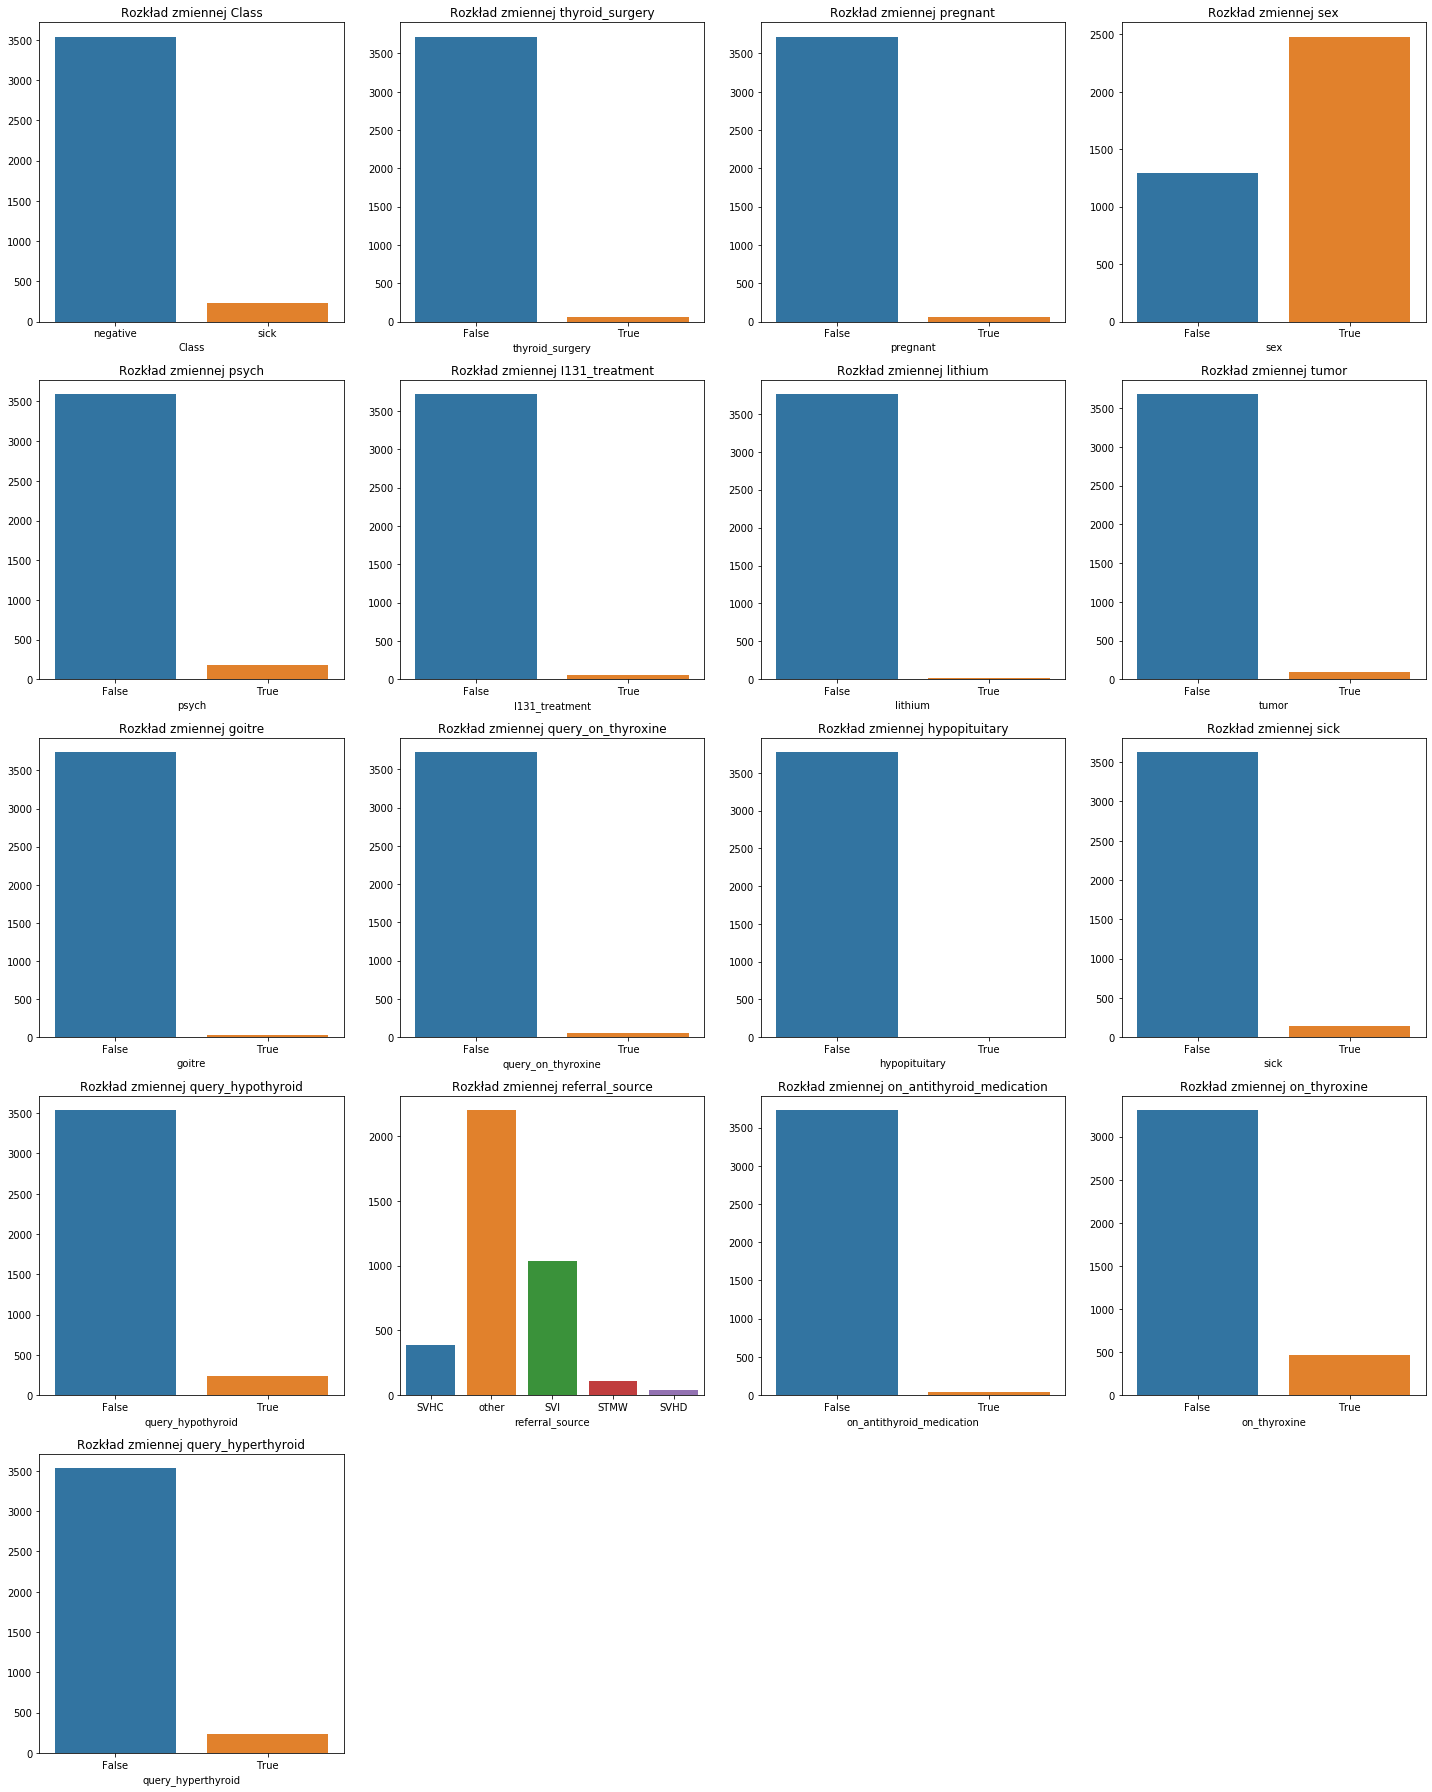

In [11]:
variables=list(set(list(cdata.columns))-set(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']))

f, axes=plt.subplots(5, 4, figsize=(20, 25))

for i in range(0, len(variables)):
    sns.countplot(data=cdata, x=variables[i], ax=axes[i//4, i%4]).set_title('Rozkład zmiennej '+variables[i])
for i in range(17, 20):
    f.delaxes(axes[i//4, i%4])
for ax in f.axes:
    ax.set_ylabel('')
    
plt.tight_layout();

#### Komentarz
* Około 2/3 badanych to kobiety,

* zmienna referral_source ma nieco ciekawszy rozkład, ale jest prawdopodbnie nieważna dla procesu uczenia maszynowego (źródło danych nie powinno mieć wpływu na klasyfikację),

* w przypadku pozostałych zmiennych w różnym stopniu dominuje wartość False (ale np. całkiem spora część badanych przujmuje tyroksynę, podstawowy hormon tarczycy) 

### Rozkłady zmiennych liczbowych

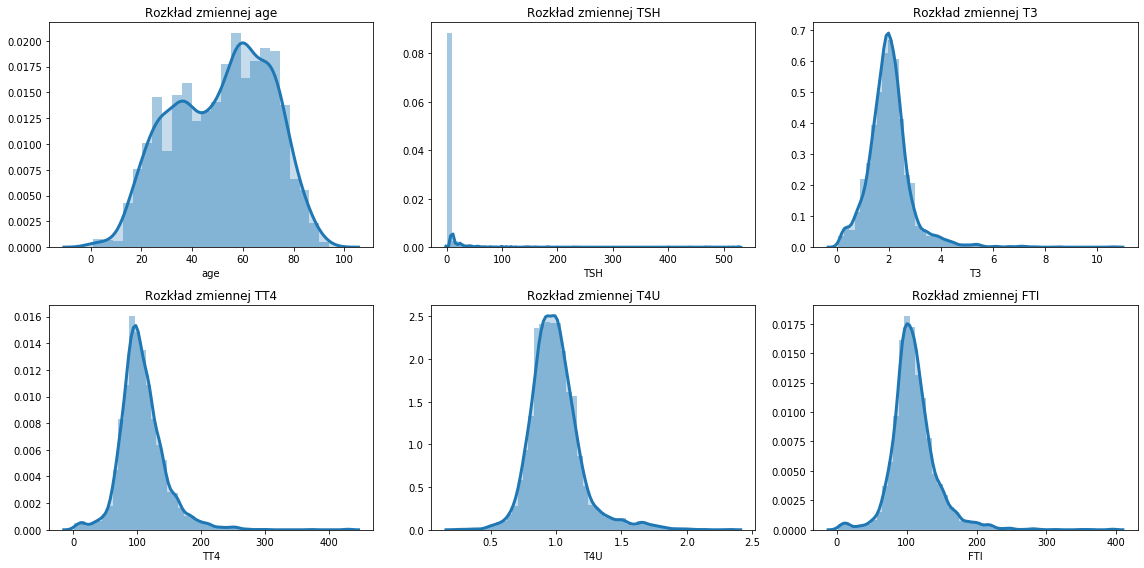

In [12]:
variables=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

f, axes = plt.subplots(2, 3, figsize=(16, 8))

for i in range(0, len(variables)):
    sns.distplot(cdata[variables[i]].dropna(), hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}, ax=axes[i//3, i%3]).set_title('Rozkład zmiennej '+variables[i])

plt.tight_layout();

### Statystyki pozycyjne i rozproszenia zmiennych liczbowych

In [13]:
cdata.loc[:, variables].describe()

,age,TSH,T3,TT4,T4U,FTI
count,3770.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000
mean,51.628912,5.086766,2.013500,108.319345,0.995000,110.469649
std,18.982990,24.521470,0.827434,35.604248,0.195457,33.089698
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,94.000000,530.000000,10.600000,430.000000,2.320000,395.000000


#### Komentarz

* Pacjenci są z całego przekroju wiekowego, rozkład jest dwumodalny, najwięcej badanych w wieku około 30 i 60 lat,

* TSH większości badanych zbliżone jest 0 (jak powinno), ale niektórzy osiągają niewiarygodne wartości ponad 400 µU/ml,

* rozkłady pozostałych hormonów są dosyć symetryczne, o różnych średnich i wariancjach (patrz tabela)

### Dygresja

#### Jaka część badanych przekroczyła dolną normę TSH?

In [14]:
str(round(100*cdata.loc[cdata.TSH<0.4].shape[0]/cdata.shape[0], 2)) + "%"

'20.47%'

#### Jaka część badanych przekroczyła górną normę TSH?

In [15]:
str(round(100*cdata.loc[cdata.TSH>4.0].shape[0]/cdata.shape[0], 2)) + "%"

'14.34%'

## Korelacje zmiennych

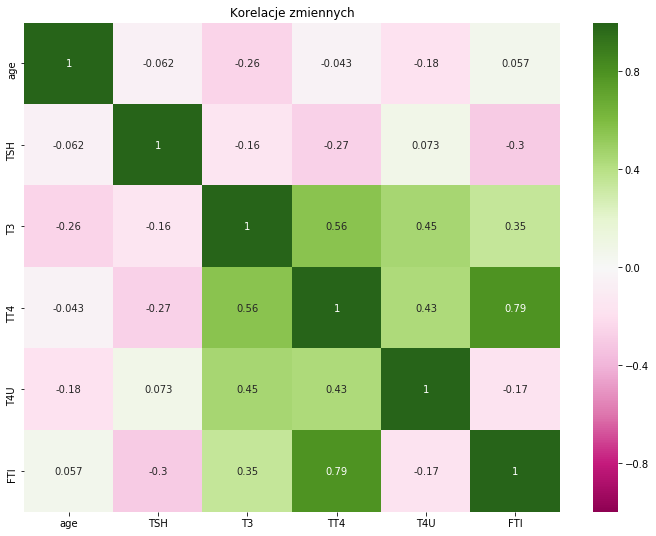

In [16]:
corr=cdata.loc[:, variables].corr()
fig, ax=plt.subplots(figsize=(12,9))  
ax=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="PiYG", center=0, vmin=-1, vmax=1)
ax.set_title('Korelacje zmiennych')
plt.show();

#### Komentarz
Wysępuje wysoka korelacja TT4 z FTI/T4U oraz T3 z FTI/T4U/TT4.

## Analiza wielowymiarowa

### Jaki jest odsetek chorych, w danym przedziale wiekowym (z podziałem na płeć)?

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
440,90.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0.03,1.9,203.0,0.90,224.0,SVI,negative
556,90.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.80,2.4,73.0,1.07,69.0,other,negative
1129,94.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.90,NaN,157.0,1.02,154.0,SVI,negative
1403,90.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.15,1.7,118.0,0.82,144.0,SVI,negative
1490,91.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.40,NaN,112.0,0.99,113.0,SVI,negative
1558,90.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.50,1.2,97.0,0.93,104.0,SVI,negative
1727,91.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.15,1.3,126.0,0.96,132.0,SVI,negative
2244,90.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5.70,1.6,89.0,0.91,98.0,other,negative
2418,93.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,2.70,0.4,77.0,0.86,90.0,other,sick
2673,94.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.90,1.3,119.0,1.04,114.0,SVI,negative


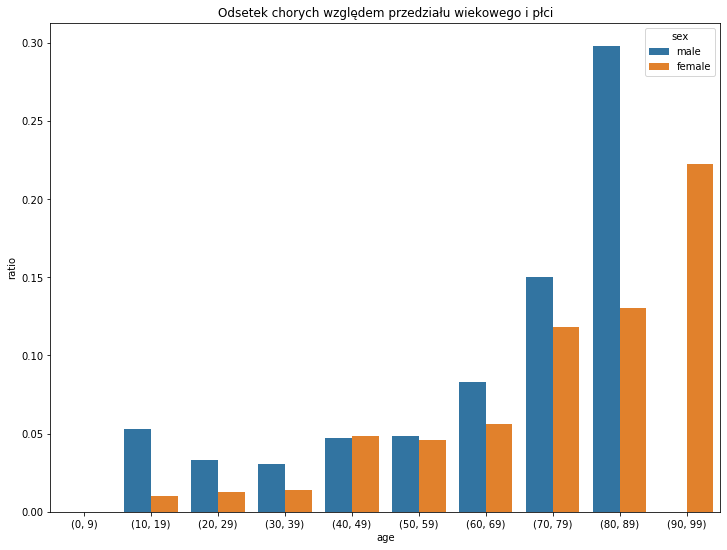

In [18]:
plotdata=pd.DataFrame({'age': pd.Series([(10*i, 9+10*i) for i in range(0,10)]).repeat(2).reset_index(drop=True), 'sex': pd.Series(['male', 'female']*10), 'ratio': pd.Series(0).repeat(16).reset_index(drop=True)})

for i in range (0, plotdata.shape[0]):
    plotdata.iloc[i, 2]=cdata.loc[(cdata.sex==(True if plotdata.sex[i]=='female' else False))&(cdata.age>=plotdata.age[i][0])&(cdata.age<=plotdata.age[i][1])&(cdata.Class=='sick')].shape[0]/cdata.loc[(cdata.sex==(True if plotdata.sex[i]=='female' else False))&(cdata.age>=plotdata.age[i][0])&(cdata.age<=plotdata.age[i][1])].shape[0]

fig, ax=plt.subplots(figsize=(12,9))  
sns.barplot(data=plotdata, y='ratio', x='age', hue='sex').set_title('Odsetek chorych względem przedziału wiekowego i płci');

cdata.loc[cdata.age>=90]

**Komentarz**

W każdym przedziale wiekowym, oprócz 40-49, odsetek chorych, wśród badanych, jest większy dla mężczyzn. Odsetek chorych rośnie wraz z wiekiem, szczególnie gwałtownie powyżej 60 roku życia.

### Jakie są korelacje poziomów hormonów oraz diagnozy?

In [ ]:
variables1=['T3', 'T3', 'T3', 'TT4', 'TT4']
variables2=['TT4', 'FTI', 'T4U', 'FTI', 'T4U']

f, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(0, 5):
    sns.scatterplot(data=cdata, x=variables1[i], y=variables2[i], hue='Class', alpha=0.5, ax=axes[i%5]).set_title(variables1[i]+'/'+variables2[i]);

plt.tight_layout();

#### Komentarz

Wszystkie powyższe zmienne są zauważalnie skorelowane, ale nie w równym stopniu. Największą korelację wykazują TT4 i FTI. Ponadto widać, że T3, poniżej pewnego poziomu, zwiastuje chorobę tarczycy z dużym prawdopodobieństwem. Być może wynika to z samego procesu klasyfikacji (odgórnego wyznaczenia pewnych sztywnych norm), niemniej jednak jest to bez wątpienia własność, która przyda się podczas trenowania algorytmu.

### Jakie są rozkłady poziomów hormonów wewnątrz danej diagnozy?

In [ ]:
variables=['TSH', 'T3', 'TT4', 'T4U', 'FTI']

f, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    sns.violinplot(data=cdata, x='Class', y=variables[i], alpha=0.5, ax=axes[i%5]).set_title('');

plt.tight_layout();

#### Komentarz

Rozkłady poziomów hormonów różnią się w zależności od diagnozy. Co ciekawe, rekordowe wartości TSH dotyczą osób zdrowych. Po raz kolejny widoczny jest wysoki związek niskiego poziomu T3 z chorobą.